#                        MIDTERM TEST MACHINE LEARNING - HA MANH DUNG

 ### Test 1 : Predict Used Car price (Linear – Polynomial Regression ) 


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [50]:
file = open(r"C:\Users\Ha Manh Dung\Downloads\imports-85.data", "r")
file.read()

'3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495\n3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500\n1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500\n2,164,audi,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950\n2,164,audi,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450\n2,?,audi,gas,std,two,sedan,fwd,front,99.80,177.30,66.30,53.10,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250\n1,158,audi,gas,std,four,sedan,fwd,front,105.80,192.70,71.40,55.70,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710\n1,?,audi,gas,std,four,wagon,fwd,front,105.80,192.70,71.40,55.70,2954,ohc,five,136,mpfi,3.19,3.4

In [51]:
df = pd.read_csv(r"C:\Users\Ha Manh Dung\Downloads\imports-85.data")

In [52]:
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [25]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [26]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

In [27]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [121]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df = pd.read_csv(r"C:\Users\Ha Manh Dung\Downloads\imports-85.data", delimiter=',', nrows = nRowsRead)
df.dataframeName = r"C:\Users\Ha Manh Dung\Downloads\imports-85.data"
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 204 rows and 9 columns


In [122]:
df

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [123]:
df1 = df[['3', 'alfa-romero','gas', 'std', 'two', 'convertible', 'rwd', 'front', '88.60']]

In [125]:
df1

,3,alfa-romero,gas,std,two,convertible,rwd,front,88.60
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6
1,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5
2,2,audi,gas,std,four,sedan,fwd,front,99.8
3,2,audi,gas,std,four,sedan,4wd,front,99.4
4,2,audi,gas,std,two,sedan,fwd,front,99.8
...,...,...,...,...,...,...,...,...,...
199,-1,volvo,gas,std,four,sedan,rwd,front,109.1
200,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1
201,-1,volvo,gas,std,four,sedan,rwd,front,109.1
202,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1


C:\Users\Ha Manh Dung\AppData\Local\Temp/ipykernel_16144/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\Ha Manh Dung\AppData\Local\Temp/ipykernel_16144/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\Ha Manh Dung\AppData\Local\Temp/ipykernel_16144/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
C:\Users\Ha Manh Dung\AppData\Local\Temp/ipykernel_16144/964395601.py:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specif

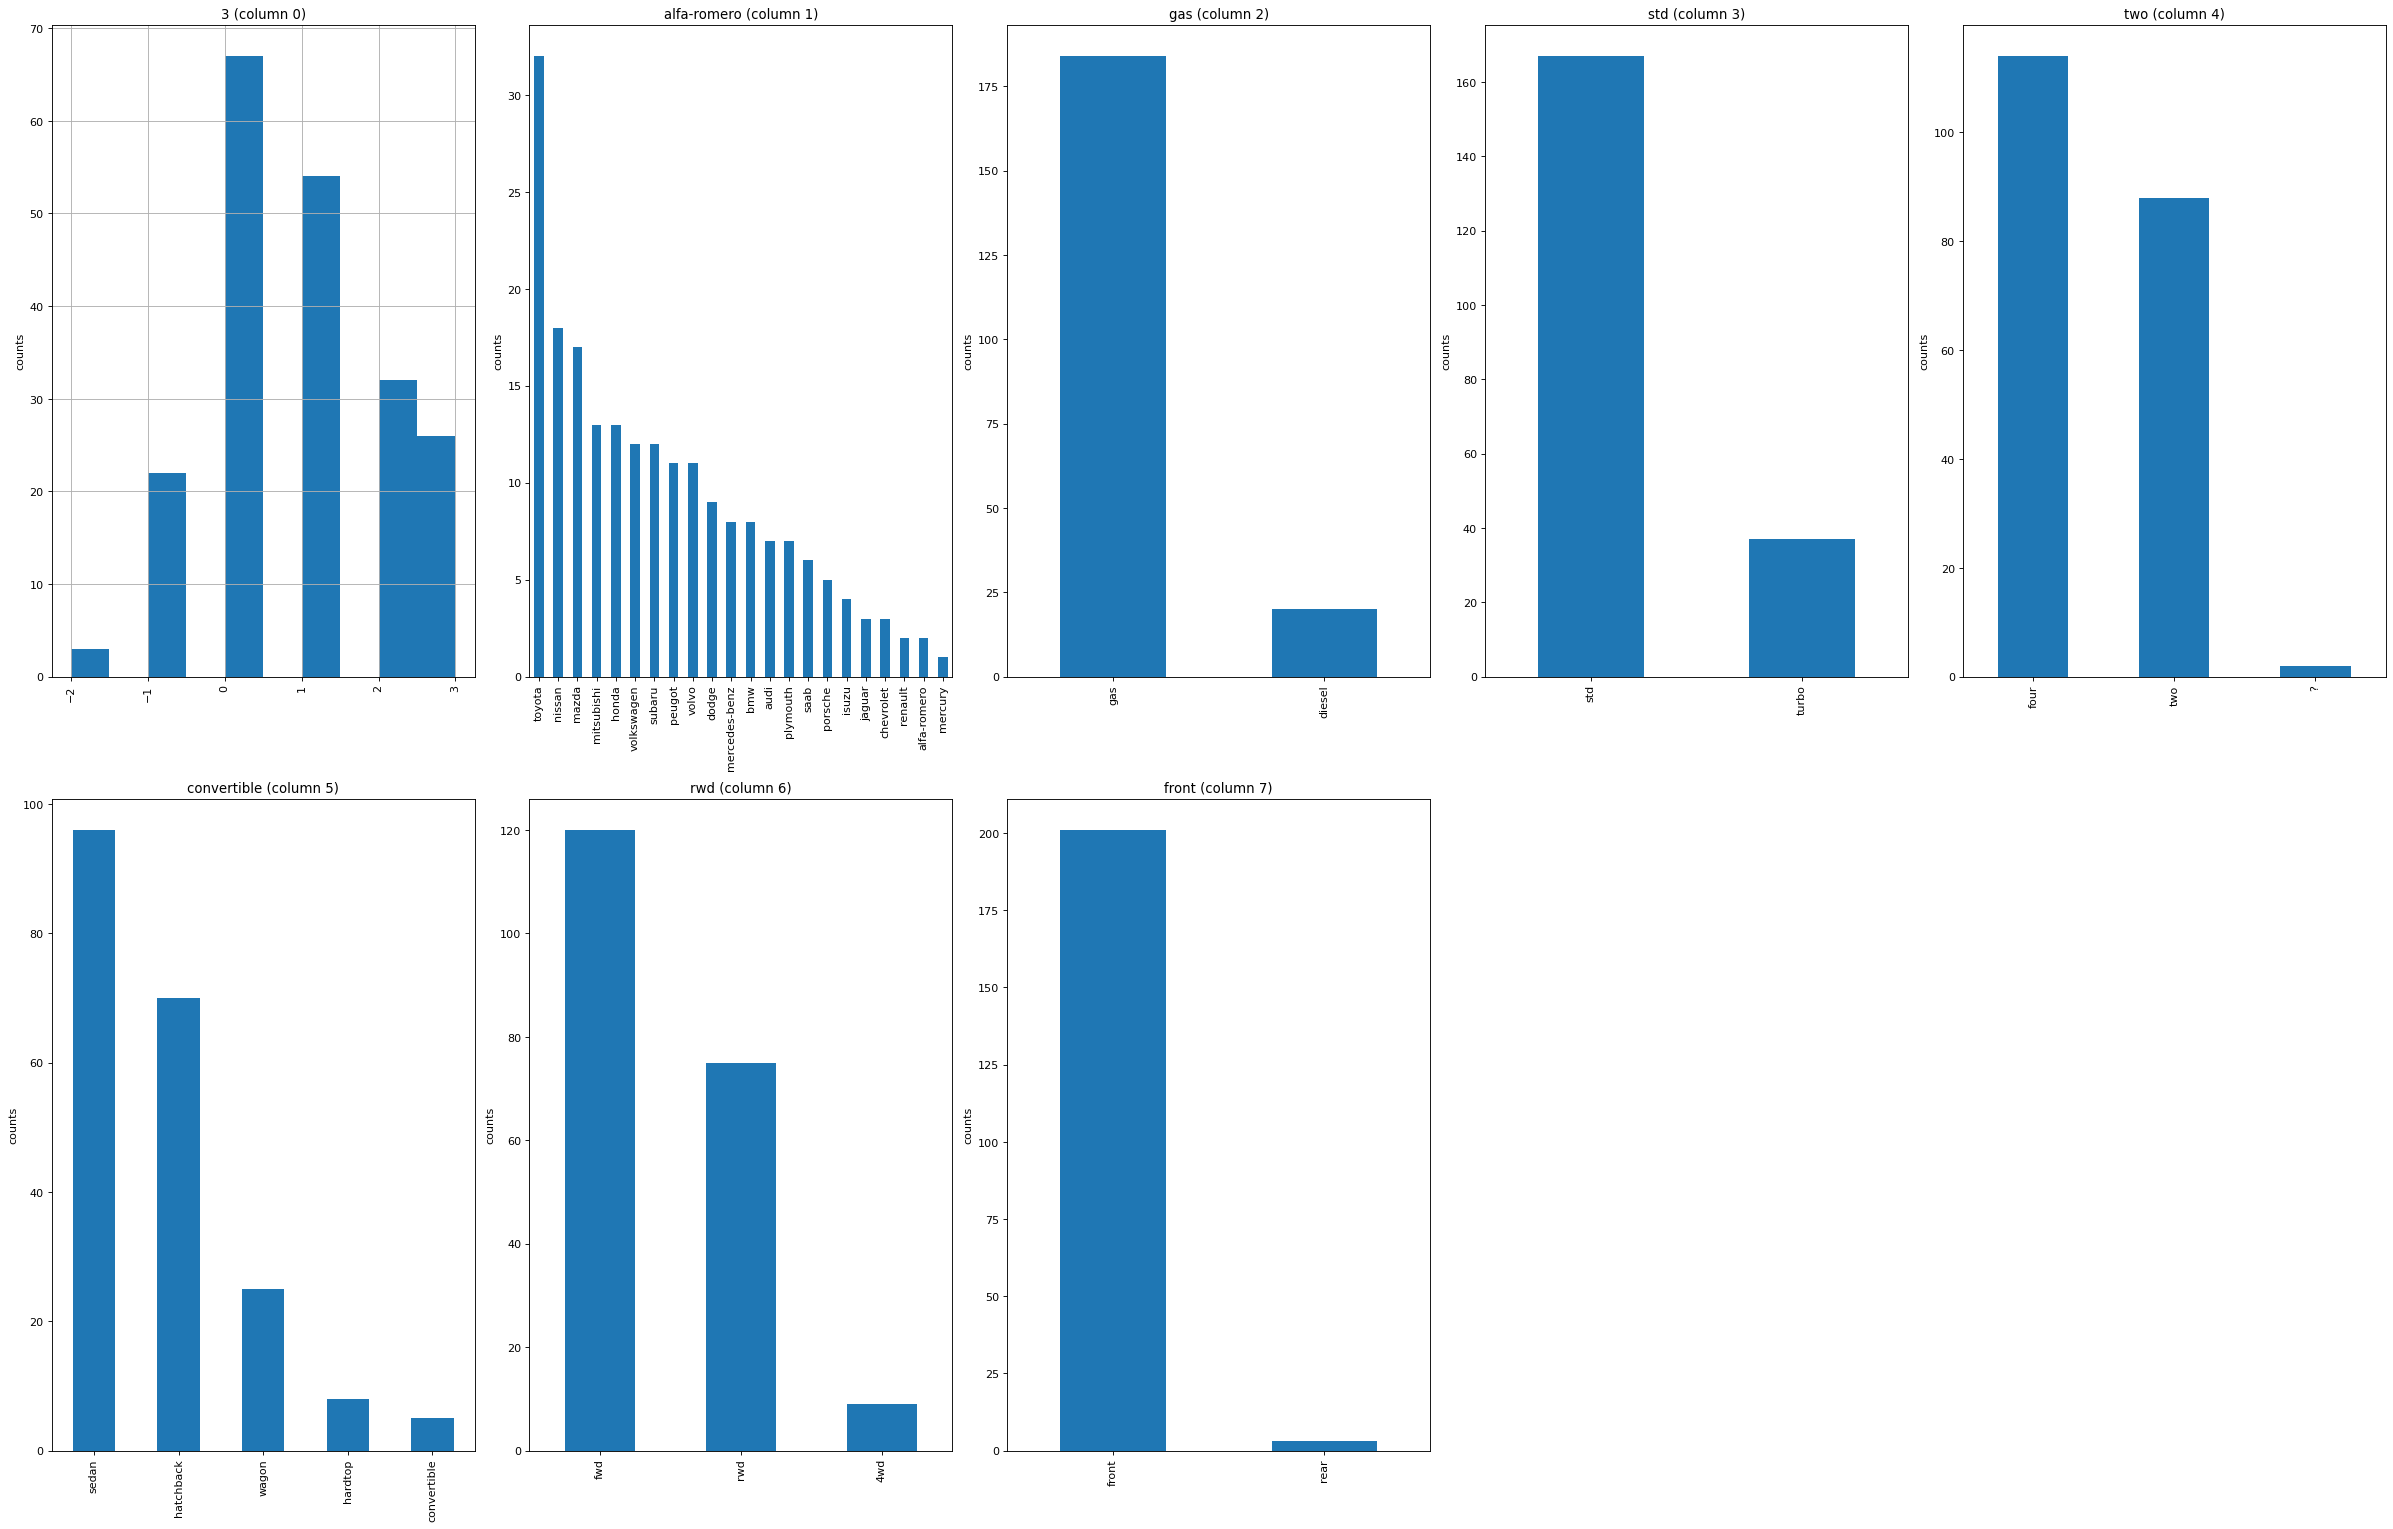

In [126]:
plotPerColumnDistribution(df1, 10, 5)

C:\Users\Ha Manh Dung\AppData\Local\Temp/ipykernel_16144/1658742073.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns') # drop columns with NaN


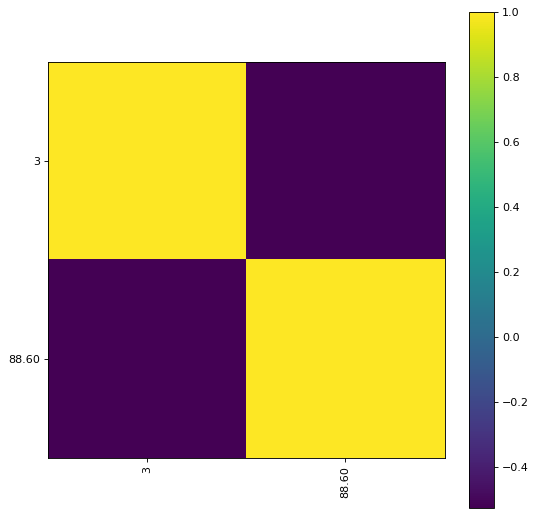

In [127]:
plotCorrelationMatrix(df1, 8)

C:\Users\Ha Manh Dung\AppData\Local\Temp/ipykernel_16144/102845399.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


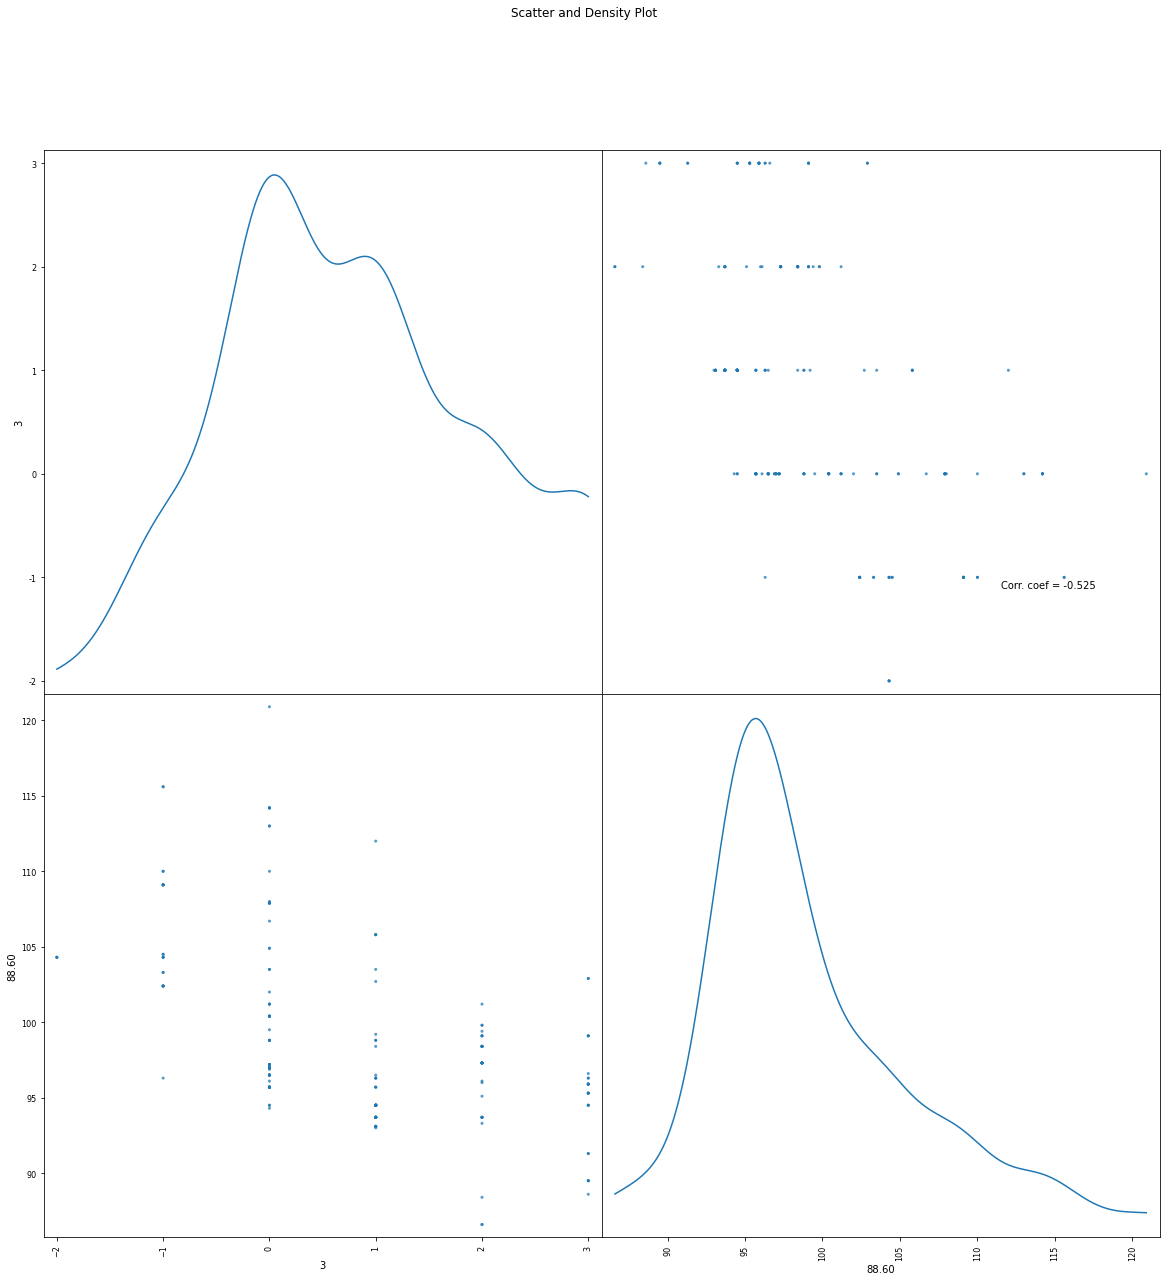

In [128]:
plotScatterMatrix(df1, 20, 10)

In [136]:
#Define category columns
cat_cols = ['symboling', 'carname', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
            'drive-wheels', 'engine-location', 'fuel-system']

In [137]:
#Converting type of categorical columns to category
for col in cat_cols:
    df1[col] = df1[col].astype('category')

KeyError: 'symboling'

In [82]:
#Converting  numeric to categorical variables
dummied = pd.get_dummies(df1[cat_cols], drop_first = True)

KeyError: "None of [Index(['symboling', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',\n       'drive-wheels', 'engine-location', 'fuel-system', 'engine-type',\n       'num-of-cylinders'],\n      dtype='object')] are in the [columns]"

In [83]:
plotCorrelationMatrix(dummied, 8)

NameError: name 'dummied' is not defined

In [84]:
#adding price column with categorical varaibles
df2=pd.concat([df1['price'],dummied],axis =1)

KeyError: 'price'

In [85]:
# Plotting graph between price and categorical variables
plotCorrelationMatrix(df2, 8)

NameError: name 'df2' is not defined

In [86]:
# Coorelation amnong price and categorical variables
df2.corr(method='pearson', min_periods=1)

NameError: name 'df2' is not defined

In [87]:
# create X and y
feature_cols = ['symboling']
X = df1[feature_cols]
y = df1.price

KeyError: "None of [Index(['symboling'], dtype='object')] are in the [columns]"

In [88]:
#Convertng categorical variable to numeric for make 
#dummy_make = pd.get_dummies(df1['make'], drop_first = True)
#df_make=pd.concat([df1['price'],dummy_make],axis =1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            204 non-null    int64  
 1   ?            204 non-null    object 
 2   alfa-romero  204 non-null    object 
 3   gas          204 non-null    object 
 4   std          204 non-null    object 
 5   two          204 non-null    object 
 6   convertible  204 non-null    object 
 7   rwd          204 non-null    object 
 8   front        204 non-null    object 
 9   88.60        204 non-null    float64
 10  168.80       204 non-null    float64
 11  64.10        204 non-null    float64
 12  48.80        204 non-null    float64
 13  2548         204 non-null    int64  
 14  dohc         204 non-null    object 
 15  four         204 non-null    object 
 16  130          204 non-null    int64  
 17  mpfi         204 non-null    object 
 18  3.47         204 non-null    object 
 19  2.68    

In [89]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

NameError: name 'X' is not defined

In [90]:
# print the coefficients
print (linreg.intercept_)
print (linreg.coef_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

KeyError: 'height'

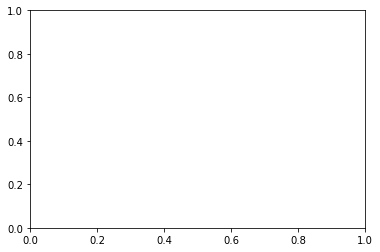

In [91]:
# Plot the graph between symboling and price
df1.plot(kind='scatter', x='height', y='price', alpha=0.2)

In [92]:
# Seaborn scatter plot with regression line
import seaborn as sns
sns.lmplot(x='height', y='price', data=df1, aspect=1.5, scatter_kws={'alpha':0.2})

KeyError: "None of [Index(['height', 'price'], dtype='object')] are in the [columns]"

KeyError: 'length'

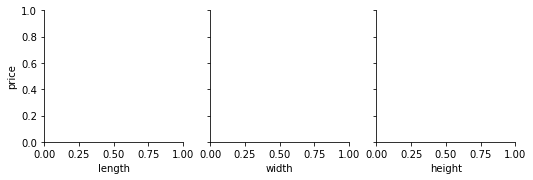

In [93]:
feature_cols = ['length', 'width', 'height']
import seaborn as sns
# multiple scatter plots in Seaborn
sns.pairplot(df1, x_vars=feature_cols, y_vars='price', kind='reg')

KeyError: 'length'

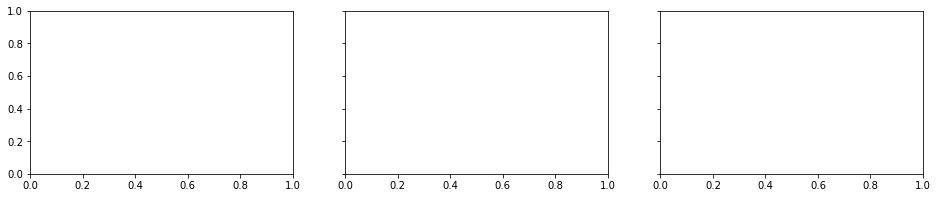

In [94]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    df1.plot(kind='scatter', x=feature, y='price', ax=axs[index], figsize=(16, 3))

In [95]:
#Line plot for price

df1.price.plot()

AttributeError: 'DataFrame' object has no attribute 'price'

In [96]:
#boxplot fir price group by length
df1.boxplot(column='price', by='length')

KeyError: 'length'

### Test 2: Predict Loan Pay Off ( Logistic Regression ) 

In [138]:
import os
import numpy as np
import pandas as pd
import datetime 
import seaborn as sns
sns.set_style("dark")

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [139]:
def my_read_file(filename):
    df = pd.read_csv(filename)
    print("{}: Reading {}.".format(now(), filename))
    print("{}: The data contains {} observations with {} columns".format(now(), df.shape[0], df.shape[1]))
    return df

def now():
    tmp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    return tmp

# Self-defined function to read dataframe and find the missing data on the columns and # of missing
def checking_na(df):
    try:
        if (isinstance(df, pd.DataFrame)):
            df_na_bool = pd.concat([df.isnull().any(), df.isnull().sum(), (df.isnull().sum()/df.shape[0])*100],
                                   axis=1, keys=['df_bool', 'df_amt', 'missing_ratio_percent'])
            df_na_bool = df_na_bool.loc[df_na_bool['df_bool'] == True]
            return df_na_bool
        else:
            print("{}: The input is not panda DataFrame".format(now()))

    except (UnboundLocalError, RuntimeError):
        print("{}: Something is wrong".format(now()))

In [140]:
loan_data = my_read_file("https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv")
print("\n\n")
print(checking_na(loan_data))

2023-01-31 15:46:32: Reading https://raw.githubusercontent.com/maxtran1997gmail/Files/main/loan_train.csv.
2023-01-31 15:46:32: The data contains 346 observations with 10 columns



Empty DataFrame
Columns: [df_bool, df_amt, missing_ratio_percent]
Index: []


In [141]:
loan_data.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [143]:
loan_data.pop('Unnamed: 0')

0        0
1        2
2        3
3        4
4        6
      ... 
341    394
342    395
343    397
344    398
345    399
Name: Unnamed: 0, Length: 346, dtype: int64

In [145]:
loan_data.pop('Unnamed: 0.1')

0        0
1        2
2        3
3        4
4        6
      ... 
341    394
342    395
343    397
344    398
345    399
Name: Unnamed: 0.1, Length: 346, dtype: int64

In [146]:
loan_data.head(5)

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### 1. EDA
### In this section, let's explore the data in-depth.

1. Loan_ID - This is just the identifier for each loan by each customers, we can ignore this field and will drop it at the end of EDA process
2. loan_status
This field is actually the target variables we are trying to predict. Let's look at the LoV within the column and the sizing

['PAIDOFF' 'COLLECTION']


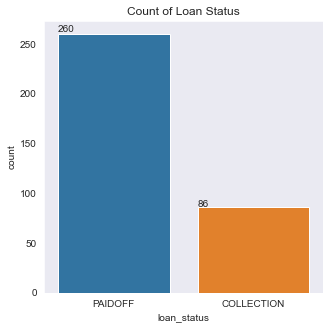

In [147]:
print(loan_data.loan_status.unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(loan_data.loan_status)
ax.set_title("Count of Loan Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()


### This is the loan amount at the origination.



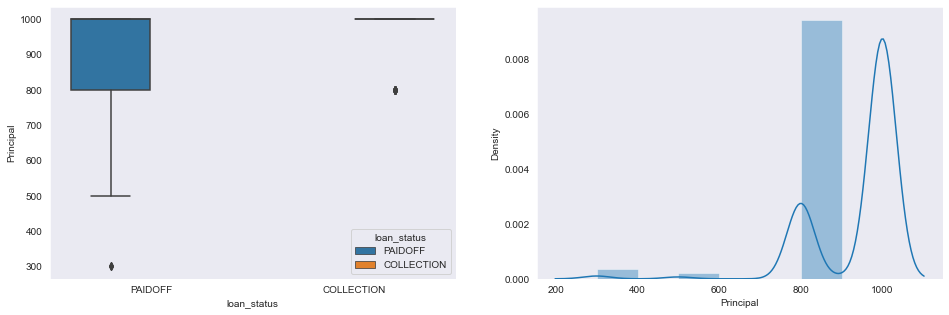

In [148]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x='loan_status', y='Principal', data=loan_data, hue='loan_status', ax=axs[0])
sns.distplot(loan_data.Principal, bins=range(300, 1000, 100), ax=axs[1], kde=True)
plt.show();

### This is the payoff schedule, which can be in week, month etc.



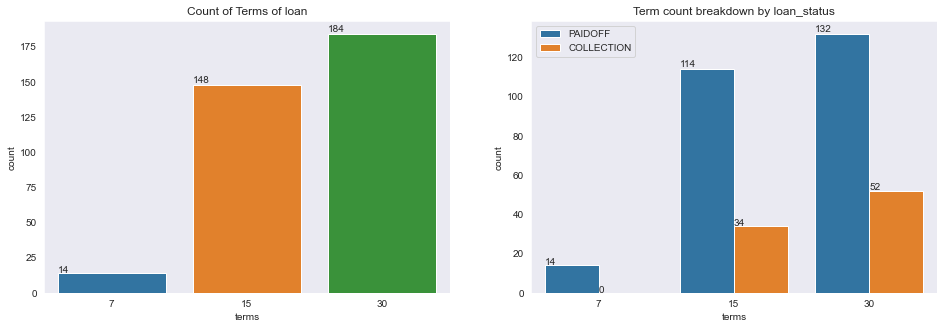

In [150]:
fig, axs = plt.subplots(1, 2, figsize=(16,5))
sns.countplot(loan_data.terms, ax=axs[0])
axs[0].set_title("Count of Terms of loan")
for p in axs[0].patches:
    axs[0].annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

sns.countplot(x='terms', hue='loan_status', data=loan_data, ax=axs[1])
axs[1].set_title("Term count breakdown by loan_status")
for t in axs[1].patches:
    if (np.isnan(float(t.get_height()))):
        axs[1].annotate(0, (t.get_x(), 0))
    else:
        axs[1].annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

axs[1].legend(loc='upper left')
plt.show();

### These data points are essentially related to the date of the loan and payment.



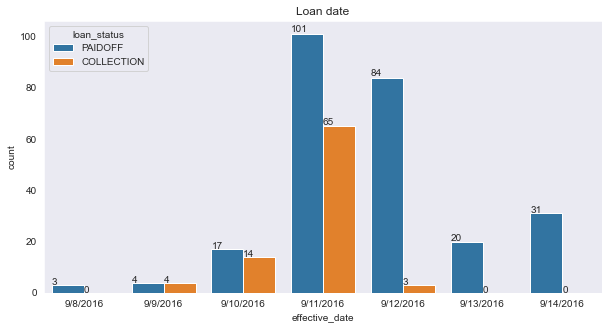

In [156]:
fig = plt.figure(figsize=(10,5))
ax = sns.countplot(x='effective_date', hue='loan_status', data=loan_data)
ax.set_title('Loan date')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
plt.show();

# Note: if we think that the day of week, or month has the significant factor to the loan status
# Below is the function which we can use to extract the year, month, or day:
# pd.DatetimeIndex(loan_data.effective_date).year
# pd.DatetimeIndex(loan_data.effective_date).month
# pd.DatetimeIndex(loan_data.effective_date).day

## Test 4 : Wine Classification

In [160]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


In [162]:
df=pd.read_csv(r'C:\Users\Ha Manh Dung\Downloads\wine.data',header=None)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [163]:
df.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

df.head(2)

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [164]:
df.isnull().sum()


name                   0
alcohol                0
malicAcid              0
ash                    0
ashalcalinity          0
magnesium              0
totalPhenols           0
flavanoids             0
nonFlavanoidPhenols    0
proanthocyanins        0
colorIntensity         0
hue                    0
od280_od315            0
proline                0
dtype: int64

<AxesSubplot:>

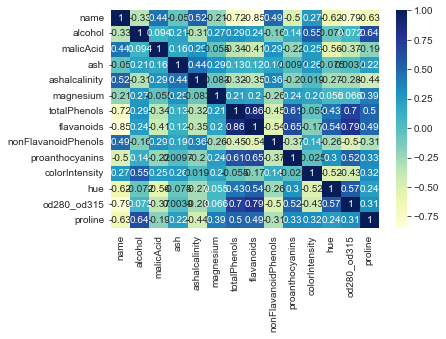

In [165]:
import seaborn as sns
corr = df[df.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)


In [166]:
X= df.drop(['name','ash'], axis=1)

X.head()

,alcohol,malicAcid,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,14.23,1.71,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [167]:
Y=df.iloc[:,:1]
Y.head(2)

,name
0,1
1,1


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(124, 12)
(54, 12)


In [180]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

print('Models appended...')

ModuleNotFoundError: No module named 'xgboost'

In [179]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=0)
    cv_result = cross_val_score(model,X_train,Y_train.values.ravel(), cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.